#Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We normalize the inputs to between 0 to 1.0 to:<br>
1. Prevents instability during training of NN<br>
2. Faster convergence of training in NN<br>


In [ ]:
# https://www.tensorflow.org/datasets/catalog/cifar10
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.reshape(-1, 32,32,3) # 50,000 pic, ensure the right shape
X_test = X_test.reshape(-1, 32,32,3) # 10,000 pic
X_train = X_train.astype('float32') / 255.0 #input data needs to be normalized, after converting to float
X_test = X_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10) # one hot-encode format, 50,000 labels, 10 categories
y_test = tf.keras.utils.to_categorical(y_test, 10) # one hot-encode format, 10,000 labels, 10 categories

#X_train Example

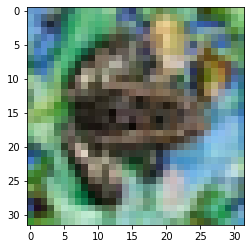

In [ ]:
import matplotlib.pyplot as plt
digitalImg = X_train[200].reshape(32, 32, 3) # a frog
plt.imshow(digitalImg)

In [ ]:
print(y_train[200])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#Setup Model

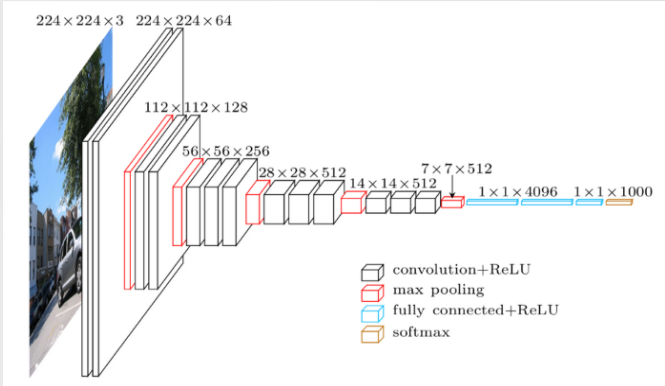

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

In [ ]:
model = Sequential()  # groups a linear stack of layers into a tf.keras.Model
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3),padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(GlobalAveragePooling2D(data_format='channels_last')) # image array is reduced to size 1

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
global_average_pooling2d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               3

#Compile & Fit

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
history = model.fit(X_train,y_train,epochs=20,batch_size=100,validation_data=(X_test,y_test))

Epoch 1/20
500/500 [==============================] - 10s 16ms/step - loss: 1.8432 - acc: 0.2839 - val_loss: 1.7089 - val_acc: 0.3363
Epoch 2/20
500/500 [==============================] - 7s 14ms/step - loss: 1.5234 - acc: 0.4234 - val_loss: 1.3669 - val_acc: 0.4926
Epoch 3/20
500/500 [==============================] - 7s 13ms/step - loss: 1.3371 - acc: 0.5064 - val_loss: 1.2727 - val_acc: 0.5257
Epoch 4/20
500/500 [==============================] - 6s 12ms/step - loss: 1.2199 - acc: 0.5490 - val_loss: 1.1740 - val_acc: 0.5685
Epoch 5/20
500/500 [==============================] - 7s 13ms/step - loss: 1.1286 - acc: 0.5835 - val_loss: 1.0758 - val_acc: 0.6067
Epoch 6/20
500/500 [==============================] - 6s 13ms/step - loss: 1.0561 - acc: 0.6165 - val_loss: 1.0402 - val_acc: 0.6174
Epoch 7/20
500/500 [==============================] - 6s 12ms/step - loss: 0.9943 - acc: 0.6406 - val_loss: 0.9739 - val_acc: 0.6480
Epoch 8/20
500/500 [==============================] - 7s 13ms/step -

#Evaluate

In [ ]:
eval=model.evaluate(X_test,y_test)
print("Accuracy = ",eval[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.7347 - acc: 0.7519
Accuracy =  0.7519000172615051


In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(20)

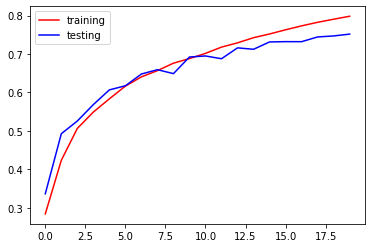

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epochs,acc,'r',label='training')
plt.plot(epochs,val_acc,'b',label='testing')
plt.legend()

#Save the Model

In [ ]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.save('/content/drive/My Drive/app/cifar10_cnn.h5') # you can transfer this to RPi to deploy

#Let's do some predictions!

In [ ]:
#
# You can load a model and its weights with load_model and make prediction with predict method
#

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

loaded_model = load_model('/content/drive/My Drive/app/cifar10_cnn.h5')

img = load_img(path="/content/drive/MyDrive/MLDA Workshop - Intro to DL in CV/img_plane.webp", target_size=(32,32,3)) #try four too
imgArray = img_to_array(img) #convert to numpy array
print (imgArray.shape)
imgInput = imgArray.reshape(1,32,32,3).astype('float32')/255.0

predictions = loaded_model.predict(imgInput)
predicted_class=np.argmax(predictions[0], axis=-1)
print(predictions)

for i,x in enumerate(predictions[0]):
  print(i, "%.4f" % x)

predicted_class=np.argmax(predictions[0], axis=-1)
object=['airplane', 'automobile', 'bird','cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print("Predicted image is",object[predicted_class])

(32, 32, 3)
[[9.7584516e-01 4.2593520e-04 9.9143730e-03 1.9242494e-04 2.6380187e-03
  5.3846943e-05 8.4613908e-05 7.2480478e-05 1.0653281e-02 1.1989497e-04]]
0 0.9758
1 0.0004
2 0.0099
3 0.0002
4 0.0026
5 0.0001
6 0.0001
7 0.0001
8 0.0107
9 0.0001
Predicted image is airplane
